In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# About our dataset

*A dataset of 2001 samples is provided for human body Humidity, Body Temperature and the Number of Steps taken by the user. Three different classifications of stress are performed, Low Stress, Normal Stress, and High Stress.*

In [3]:
stress_data=pd.read_csv('Stress-Lysis.csv')
stress_data.head() 

,Humidity,Temperature,Step_count,Stress_Level
0,21.33,90.33,123,1
1,21.41,90.41,93,1
2,27.12,96.12,196,2
3,27.64,96.64,177,2
4,10.87,79.87,87,0


In [4]:
stress_data.describe()

,Humidity,Temperature,Step_count,Stress_Level
count,2001.000000,2001.000000,2001.000000,2001.000000
mean,20.000000,89.000000,100.141429,1.104448
std,5.777833,5.777833,58.182948,0.771094
min,10.000000,79.000000,0.000000,0.000000
25%,15.000000,84.000000,50.000000,0.000000
50%,20.000000,89.000000,101.000000,1.000000
75%,25.000000,94.000000,150.000000,2.000000
max,30.000000,99.000000,200.000000,2.000000


In [5]:
stress_data.isnull().sum()

Humidity        0
Temperature     0
Step_count      0
Stress_Level    0
dtype: int64

In [6]:
stress_data.duplicated().sum()

0

# Data Analysis

# Descriptive Statistics

In [7]:

desc_stats = stress_data.describe()
print(desc_stats)

          Humidity  Temperature   Step_count  Stress_Level
count  2001.000000  2001.000000  2001.000000   2001.000000
mean     20.000000    89.000000   100.141429      1.104448
std       5.777833     5.777833    58.182948      0.771094
min      10.000000    79.000000     0.000000      0.000000
25%      15.000000    84.000000    50.000000      0.000000
50%      20.000000    89.000000   101.000000      1.000000
75%      25.000000    94.000000   150.000000      2.000000
max      30.000000    99.000000   200.000000      2.000000


# Pairplot for feature relationships

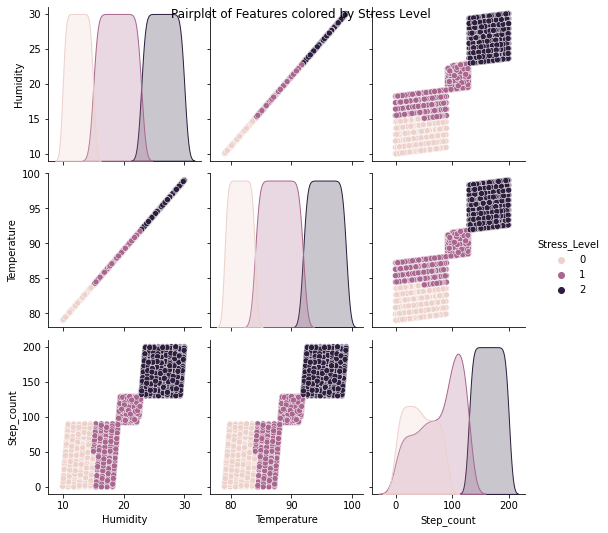

In [8]:

sns.pairplot(stress_data, hue="Stress_Level", diag_kind="kde")
plt.suptitle("Pairplot of Features colored by Stress Level")
plt.show()


# Correlation matrix

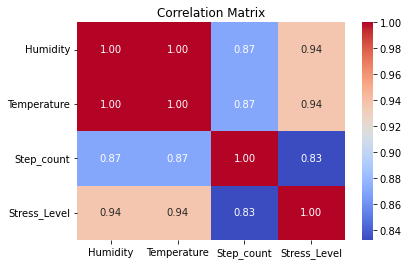

In [9]:

corr_matrix = stress_data.corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Boxplot for each feature with respect to Stress Level

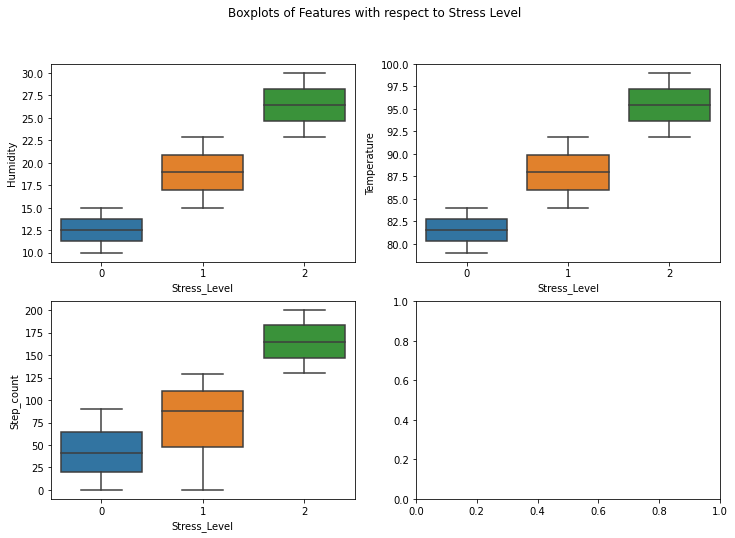

In [10]:

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

for i, col in enumerate(stress_data.columns[:-1]):
    sns.boxplot(x="Stress_Level", y=col, data=stress_data, ax=axes[i//2, i%2])

fig.suptitle("Boxplots of Features with respect to Stress Level")
plt.show()



# Histogram for each feature

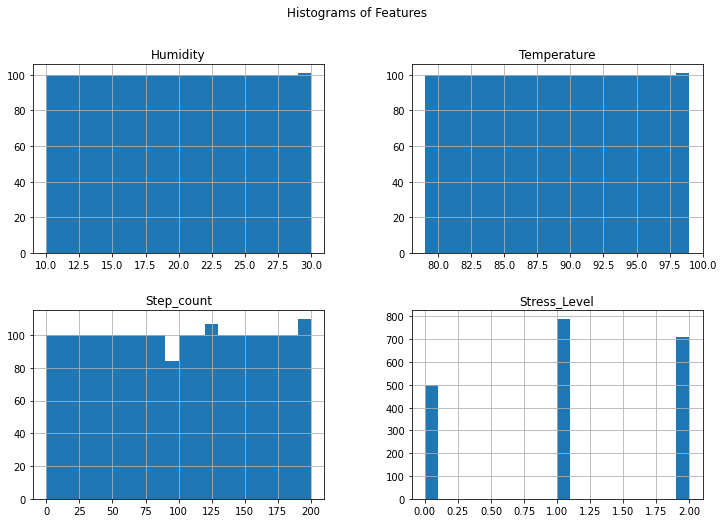

In [11]:
stress_data.hist(figsize=(12, 8), bins=20)
plt.suptitle("Histograms of Features")
plt.show()

# Split the data into features (X) and target variable (y)

In [12]:


X = stress_data.drop("Stress_Level", axis=1)
y = stress_data["Stress_Level"]

# Split the data into training and testing sets

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier

In [14]:

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Make predictions on the test set

In [15]:

y_pred = rf_classifier.predict(X_test)

# Evaluate the model

In [16]:

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")


Accuracy: 1.0


# Display classification report and confusion matrix

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        95
           1       1.00      1.00      1.00       160
           2       1.00      1.00      1.00       146

    accuracy                           1.00       401
   macro avg       1.00      1.00      1.00       401
weighted avg       1.00      1.00      1.00       401



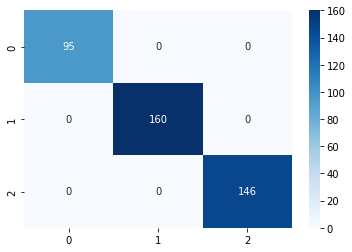

In [17]:

print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.show()

# Feature Importance

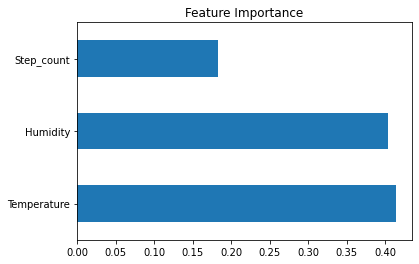

In [18]:
feature_importance = pd.Series(rf_classifier.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False).plot(kind="barh")
plt.title("Feature Importance")
plt.show()

In [20]:
#from sklearn.externals import joblib
import joblib
joblib.dump(rf_classifier, 'model.joblib')


['model.joblib']

In [21]:

import joblib
from sklearn.ensemble import RandomForestClassifier

# Assuming rf_classifier is your trained model
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

# Save the model
joblib.dump(rf_classifier, 'model.joblib')













['model.joblib']